In [5]:
# import the packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


In [3]:
# import dataset and rename colomns for better readness
df = pd.read_csv('population_panel_clean.csv')

# Rename columns
df = df.rename(columns={
    "lifeexp": "LifeExpectancy",
    "u5mort": "U5Mortality",
    "adofert": "AdoleFertility"
})

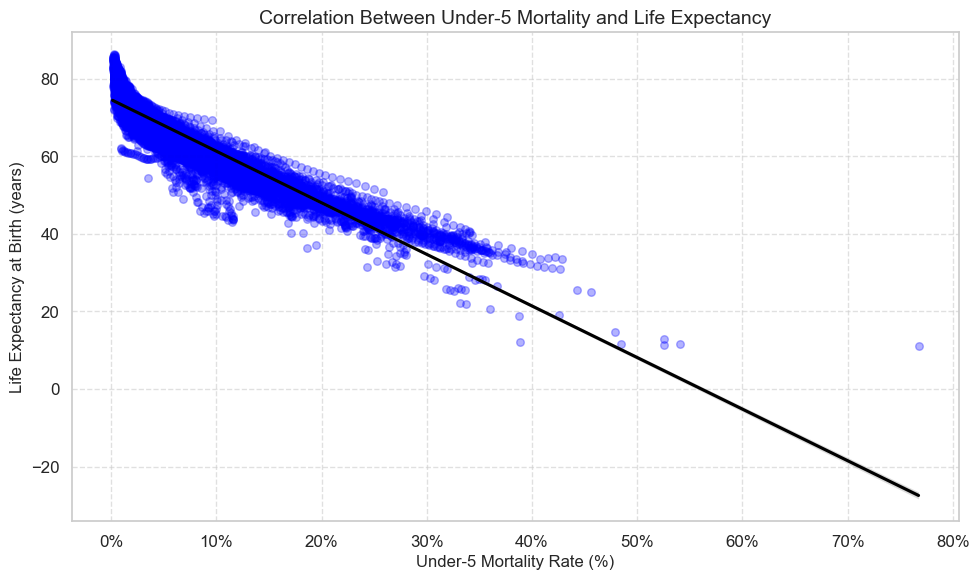

In [6]:
# Create a new column for Under-5 Mortality as a percentage
df['U5MortalityPercent'] = df['U5Mortality'] / 10

# Set up the plot style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(
    data=df,
    x="U5MortalityPercent",
    y="LifeExpectancy",
    scatter_kws={"alpha": 0.3, "s": 30},
    line_kws={"color": "black"},
    color="blue"
)

# Add titles and labels
plt.title("Correlation Between Under-5 Mortality and Life Expectancy", fontsize=14)
plt.xlabel("Under-5 Mortality Rate (%)", fontsize=12)
plt.ylabel("Life Expectancy at Birth (years)", fontsize=12)

# Format x-axis to percentage
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

# Add grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

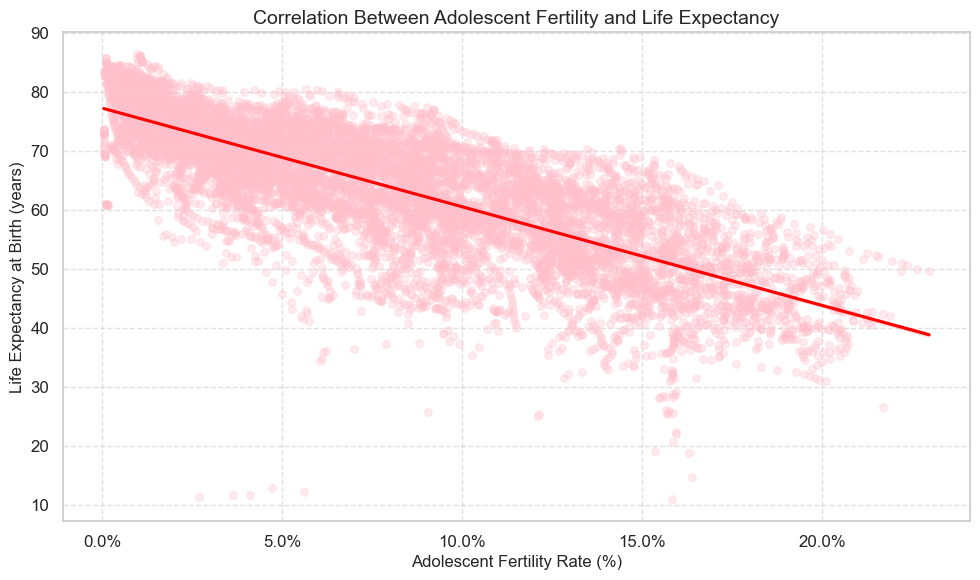

In [7]:
# Create a new column for Adolescent Fertility as a percentage
df['AdoleFertilityPercent'] = df['AdoleFertility'] / 10

# Set up the plot style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(
    data=df,
    x="AdoleFertilityPercent",
    y="LifeExpectancy",
    scatter_kws={"alpha": 0.3, "s": 30},
    line_kws={"color": "red"},
    color="pink"
)

# Add titles and labels
plt.title("Correlation Between Adolescent Fertility and Life Expectancy", fontsize=14)
plt.xlabel("Adolescent Fertility Rate (%)", fontsize=12)  # Update to percentage
plt.ylabel("Life Expectancy at Birth (years)", fontsize=12)

# Format x-axis to percentage
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

# Add grid and layout
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/1s/mwg71x0s3bq534d2byyfzkmr0000gn/T/ipykernel_70859/3909984036.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


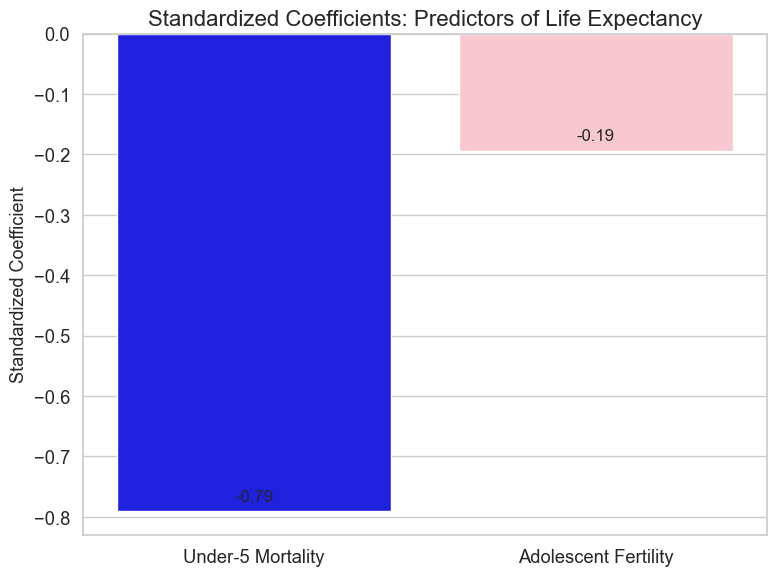

In [8]:
# Compare whether Adolescent fertility or U-5 mortality correlates more with life expectancy using standardized coefficients 


# Drop missing values (if any)
df_clean = df.dropna(subset=["LifeExpectancy", "U5Mortality", "AdoleFertility"])

# Define features and target
X = df_clean[["U5Mortality", "AdoleFertility"]]
y = df_clean["LifeExpectancy"]

# Standardize predictors and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Fit the linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Create dataframe for standardized coefficients
coef_df = pd.DataFrame({
    "Indicator": ["Under-5 Mortality", "Adolescent Fertility"],
    "Standardized Coefficient": model.coef_
}).sort_values(by="Standardized Coefficient", key=abs, ascending=False)

# Plotting
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 6))
bars = sns.barplot(
    data=coef_df,
    x="Indicator",
    y="Standardized Coefficient",
    palette=["blue", "pink"]
)

# Add values on bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f"{height:.2f}",
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=12)

# Final touches
plt.title("Standardized Coefficients: Predictors of Life Expectancy", fontsize=16)
plt.ylabel("Standardized Coefficient", fontsize=13)
plt.xlabel("")
plt.tight_layout()
plt.show()


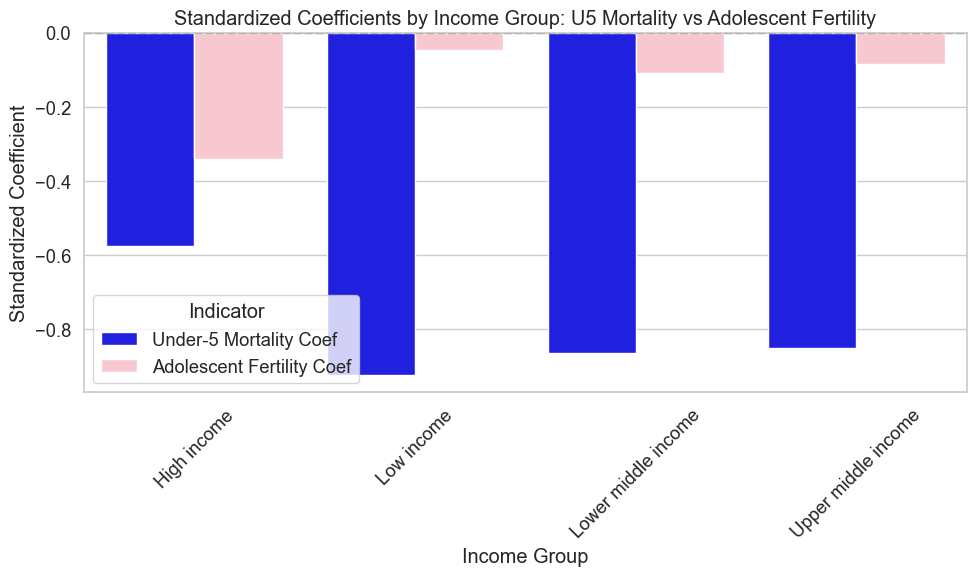


Standardized Coefficients Table:
          Income Group  Under-5 Mortality Coef  Adolescent Fertility Coef
0          High income               -0.575164                  -0.341895
1           Low income               -0.923888                  -0.047629
2  Lower middle income               -0.865206                  -0.108201
3  Upper middle income               -0.850363                  -0.085107


In [9]:
# Analysis on whether the effect sizes differ across income groups 

df = pd.read_csv('population_panel_clean.csv')
df = df.rename(columns={
    "lifeexp": "LifeExpectancy",
    "u5mort": "U5Mortality",
    "adofert": "AdoleFertility"
})

group_coefs = []

# Group by income_group and run standardized regression
for income, group in df.groupby("income_group"):
    X = group[["U5Mortality", "AdoleFertility"]]
    y = group["LifeExpectancy"]

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

    model = LinearRegression()
    model.fit(X_scaled, y_scaled)

    group_coefs.append({
        "Income Group": income,
        "Under-5 Mortality Coef": model.coef_[0],
        "Adolescent Fertility Coef": model.coef_[1]
    })

coefs_df = pd.DataFrame(group_coefs)

coefs_melted = coefs_df.melt(id_vars="Income Group", 
                             value_vars=["Under-5 Mortality Coef", "Adolescent Fertility Coef"],
                             var_name="Indicator", 
                             value_name="Standardized Coefficient")

sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.barplot(data=coefs_melted, x="Income Group", y="Standardized Coefficient", hue="Indicator", palette=["blue", "pink"])
plt.title("Standardized Coefficients by Income Group: U5 Mortality vs Adolescent Fertility")
plt.ylabel("Standardized Coefficient")
plt.xlabel("Income Group")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

print("\nStandardized Coefficients Table:")
print(coefs_df)


In [10]:
# Add a new column that tells which factor is stronger
coefs_df['Stronger Predictor'] = coefs_df.apply(
    lambda row: 'Under-5 Mortality' if abs(row['Under-5 Mortality Coef']) > abs(row['Adolescent Fertility Coef']) else 'Adolescent Fertility',
    axis=1
)

print("\nWhich Factor Has Stronger Influence by Income Group:")
print(coefs_df[['Income Group', 'Stronger Predictor']])


Which Factor Has Stronger Influence by Income Group:
          Income Group Stronger Predictor
0          High income  Under-5 Mortality
1           Low income  Under-5 Mortality
2  Lower middle income  Under-5 Mortality
3  Upper middle income  Under-5 Mortality
